In [14]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [15]:
# Import the train dataset

data = pd.read_csv("bike-sharing_hourly.csv")

In [16]:
# Understand the shape (columns, rows) of the dataset

data.shape

(17379, 17)

In [17]:
# Check for null values

data.isnull().mean()

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
hr            0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

There are no null values

In [18]:
# Checking outliers

#Select only numeric columns
numeric_cols = data.select_dtypes(include=['int64', 'float']).columns

#Calculate z-score for each numeric column
z_scores = (data[numeric_cols] - data[numeric_cols].mean()) / data[numeric_cols].std()

#Calculate outliers in each column
outlier_pct = (np.abs(z_scores) > 3).sum() / len(data) * 100

print("Percentage of outliers per column:")
print(outlier_pct)

Percentage of outliers per column:
instant       0.000000
season        0.000000
yr            0.000000
mnth          0.000000
hr            0.000000
holiday       2.877036
weekday       0.000000
workingday    0.000000
weathersit    0.017262
temp          0.000000
atemp         0.005754
hum           0.126590
windspeed     0.615686
casual        2.687151
registered    2.134760
cnt           1.403993
dtype: float64


We can see that there are are some columns with outliers. They are `holiday`, `weathersit`, `atemp`, `hum`, `windspeed`, `casual`, `registered`, `cnt`.

In [19]:
# See the datatypes of the different columns of the dataset

data.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

We can appreciate that all the columns have a number data type, but we have to be careful because some of them are categorical such as `season`, `weekday`, `holiday`, `weathersit`, `workingday`, `mnth`, `yr`, `hr`.

Also, we can categorize the features to do the EDA. The categories would be:
1. Time:
    - Season
    - yr
    - mnth
    - holiday
    - weekday
    - workingday
    
2. Weather:
    - weathersit
    - temp
    - atemp
    - hum
    - windspeed

In [20]:
# Renaming the columns

data.rename(columns=
            {'dteday' : 'Datetime',
             'season' : 'Season',
             'yr' : 'Year',
             'mnth' : 'Month',
             'hr' : 'Hour',
             'holiday' : 'Is_Holiday',
             'weekday' : 'Weekday',
             'workingday' : 'Is_Working_Day',
             'weathersit' : 'Weather_Condition',
             'temp' : 'Temperature',
             'atemp' : 'Temperature_Feel',
             'hum' : 'Humidity',
             'windspeed' : 'Wind Speed',
             'casual' : 'Casual_Users',
             'registered' : 'Registered_Users',
             'cnt' : 'Total_Users'
            }, inplace=True)

<Axes: title={'center': 'Total Users Distribution Plot'}, xlabel='Total_Users', ylabel='Density'>

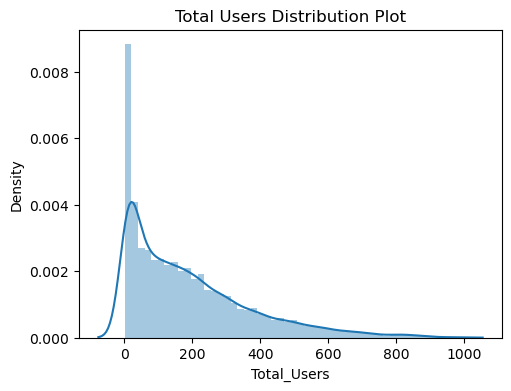

In [21]:
# Visualize the distribution of the target variable

plt.figure(figsize=(12, 4))

plt.subplot(1,2,1)
plt.title('Total Users Distribution Plot')
sns.distplot(data['Total_Users'])

We can see that our target data is right skewed which tells us that the bike-service sharing rate is low.

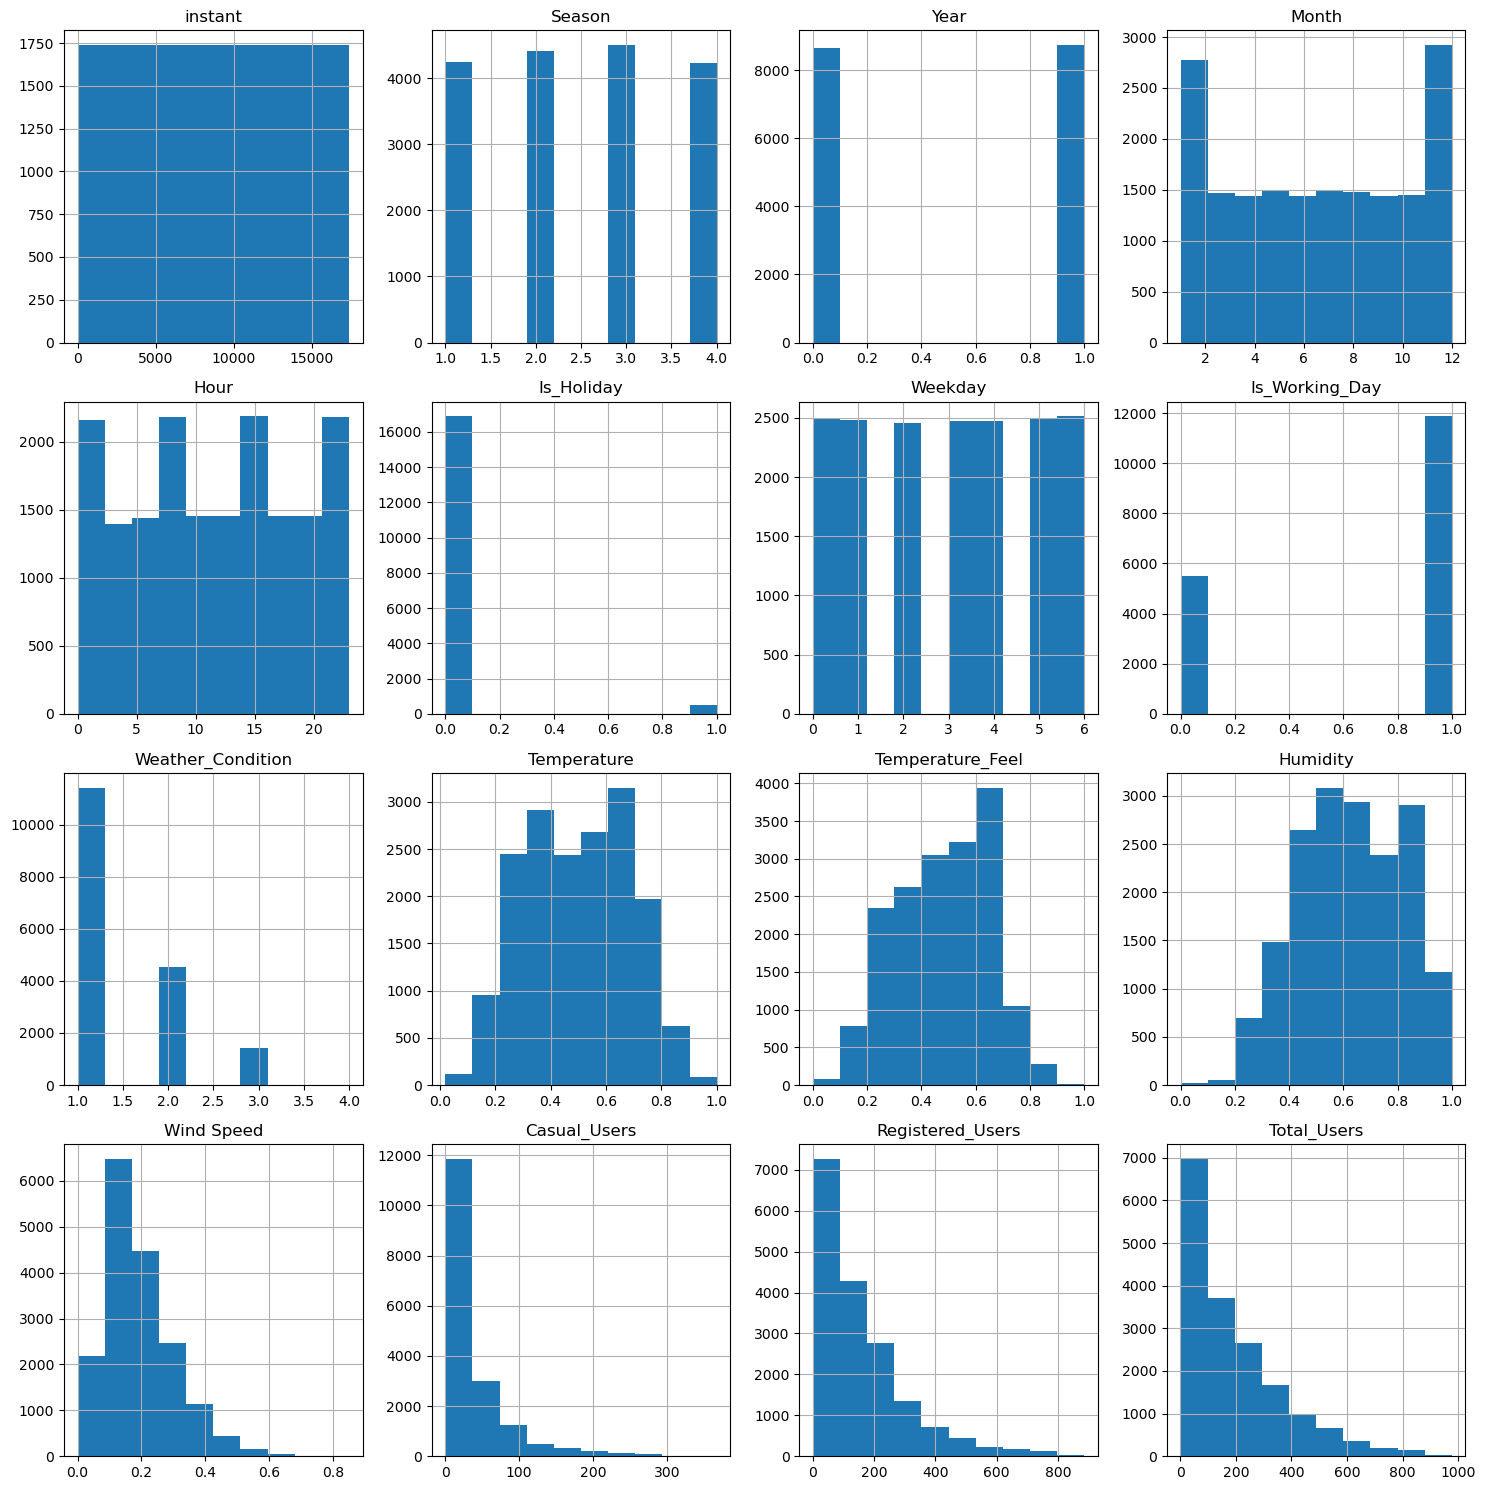

In [22]:
# Visualize the histogram of the different columns

data.hist(figsize = (15,15))
plt.tight_layout()
plt.show()

We can confirm that the features mentiones above (`Season`, `Weekday`, `Is_Holiday`, `Weather_Ccondition`, `Is_Working_Day`, `Month`, `Year`, `Hour`) have a categorical data type byt have numerical data type. Also, this pair plot helps us see that there are some features that are right-skewed like `Casual_users`, `Registered_Users`, `Total_Users` and `Wind Speed`. 

#### Time Category Analysis

[Text(0.5, 1.0, 'Season wise hourly distribution of Total_Users')]

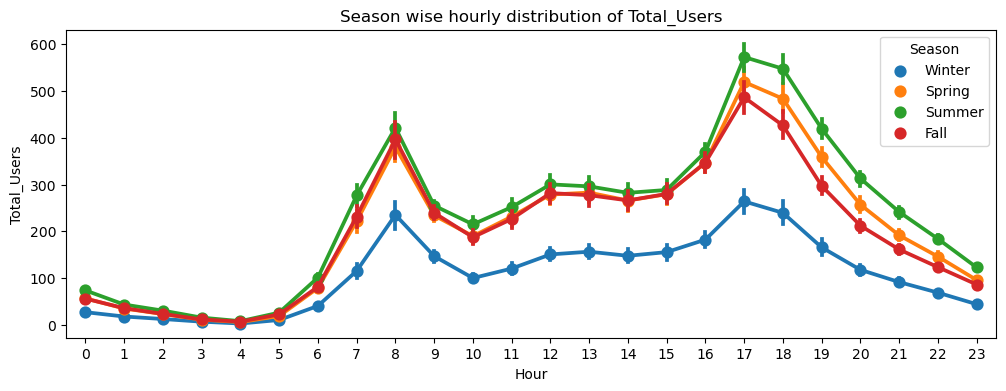

In [23]:
# Analyzing relation betwen Total Use and hourly rate in different seasons

data['Season'].replace({1 :'Winter', 2 :'Spring', 3 :'Summer', 4 : 'Fall'}, inplace=True) 

fig,ax = plt.subplots(figsize=(12, 4))
sns.pointplot(data=data[['Hour',
                           'Total_Users',
                           'Season']],
              x='Hour',
              y='Total_Users',
              hue='Season',
              ax=ax)
ax.set(title="Season wise hourly distribution of Total_Users")

The moments in which bikes-sharing service is used the most are around 8:00 and 17:00-18:00. Between the two peaks, the usage of bikes lowers and has a constant behaviour. Also, we can see that people tend to use the bike-sharing service at a higher rate in the afternoon rather than in the morrning. Probably this is related to peak hours where people are commuting to work or school.

[Text(0.5, 1.0, 'Weekday wise hourly distribution of Total_Users')]

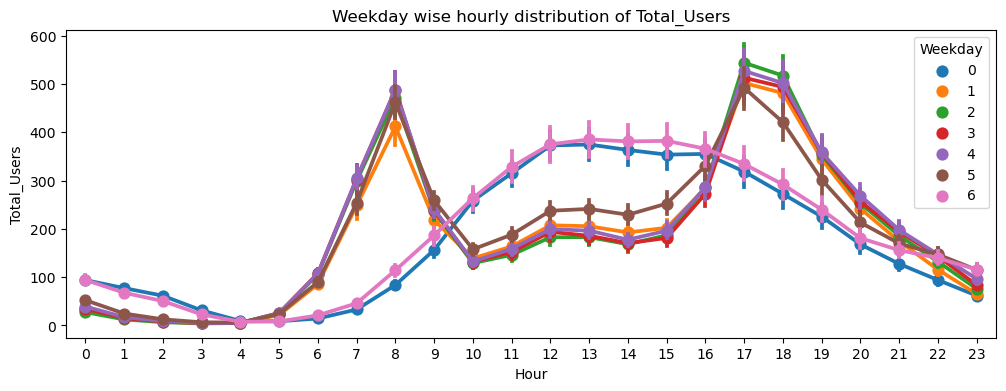

In [24]:
# Analyzing relation betwen Total Use and hourly rate in different differemt days of the week

fig,ax = plt.subplots(figsize=(12, 4))
sns.pointplot(data=data[['Hour',
                           'Total_Users',
                           'Weekday']],
              x='Hour',
              y='Total_Users',
              hue='Weekday',
              ax=ax)
ax.set(title="Weekday wise hourly distribution of Total_Users")

In the weekdays, the behaviour of bike-sharing service is the same for every day, where the peak hours are at 8:00 and between 17:00 and 18:00, with a lower and constant usage between these two peaks.

Nonetheless, in the weekend, the behaviour changes and the bike-sharing service starts increasing its usage between 8:00 and 9:00, reaches its highest rate between 13:00 and 15:00 in the afternoon and then starts to slowly decrease.

This could be associated to the activities that people do during the weekend differing to those that people to during the week (work/study).

[Text(0.5, 1.0, 'Weekday vs. Weekend or Holiday distribution of Total_Users')]

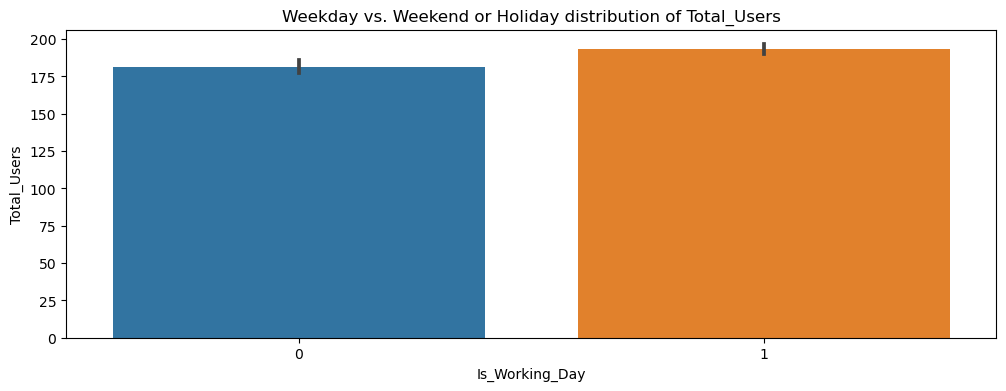

In [25]:
# Analyzing the distribution of Total Users depending on weekday or weekend+holiday

fig,ax = plt.subplots(figsize=(12, 4))
sns.barplot(data=data[['Is_Working_Day',
                           'Total_Users']],
              x='Is_Working_Day',
              y='Total_Users',
              ax=ax)
ax.set(title="Weekday vs. Weekend or Holiday distribution of Total_Users")

weekday: 1, weekend nor holiday: 0

We can see that people prefer to use the bike-sharing service during the weekdays rather than on the weekend or on a holiday.

[Text(0.5, 1.0, 'Monthly distribution of counts')]

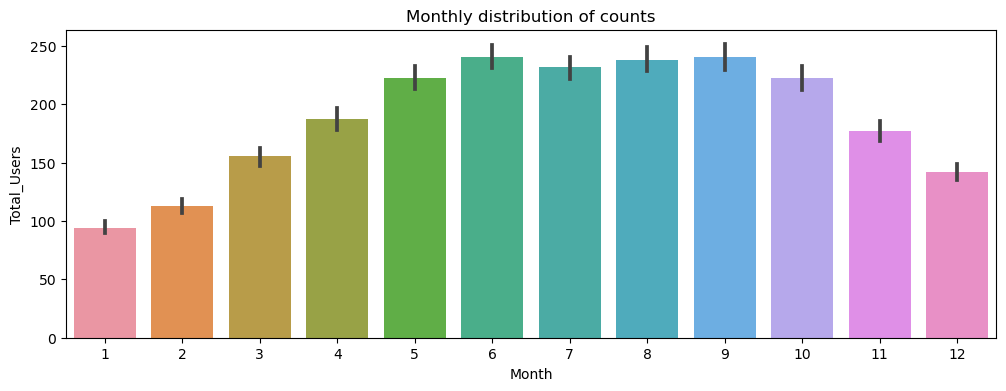

In [26]:
# Analyzing the distribution of Total Users depending on month

fig,ax = plt.subplots(figsize=(12, 4))
sns.barplot(data=data[['Month',
                           'Total_Users']],
              x='Month',
              y='Total_Users',
              ax=ax)
ax.set(title="Monthly distribution of counts")

The bike-sharing service has a slow increase in its usage as the year passes, with its lowest rate in january. In June it gets to the higer rate of usage and mantains there (with some variations) for the next 4 months. After this, it slowly starts to decay. This could be associated to the seasons and their respective climate.

[Text(0.5, 1.0, 'Seasonal distribution of counts')]

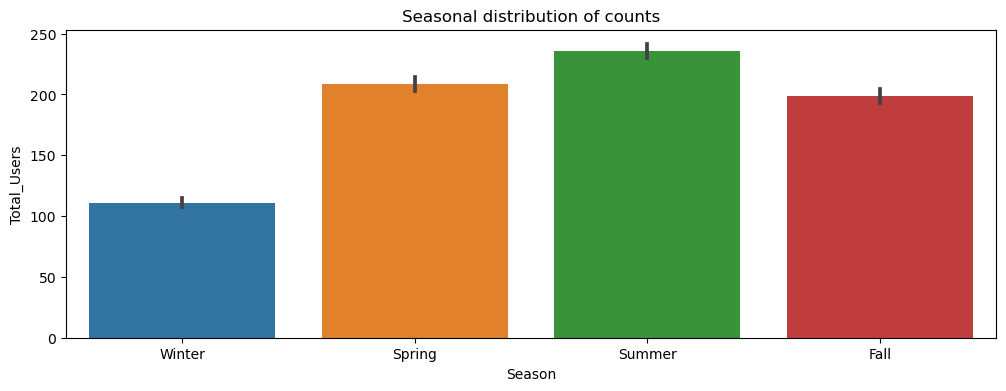

In [27]:
# Analyzing the distribution of Total Users depending on season

fig,ax = plt.subplots(figsize=(12, 4))
sns.barplot(data=data[['Season',
                           'Total_Users']],
              x='Season',
              y='Total_Users',
              ax=ax)
ax.set(title="Seasonal distribution of counts")

season (1:springer, 2:summer, 3:fall, 4:winter)

Spring is the season in which the bike-sharing service is used the least versus fall in which the rate of usage is the highest. Nonetheless, summer and winter have a bike-sharing service usage more similar to that of fall than to that of spring. 

[Text(0.5, 1.0, 'Year distribution of counts')]

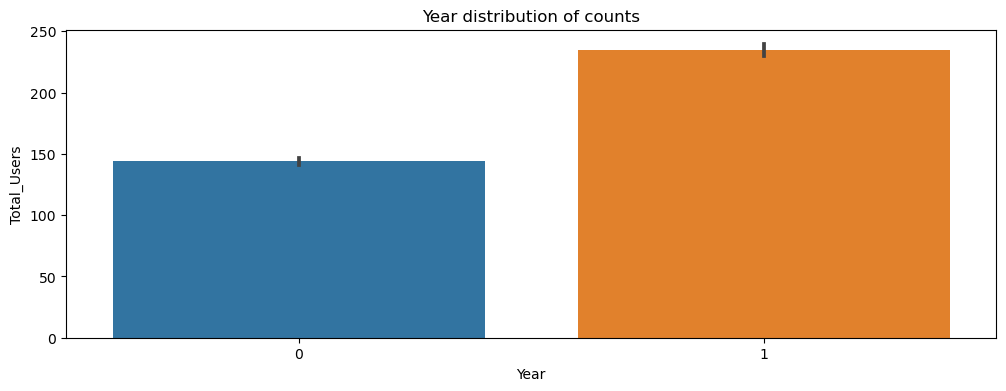

In [28]:
# Analyzing the distribution of Total Users depending on year

fig,ax = plt.subplots(figsize=(12, 4))
sns.barplot(data=data[['Year',
                           'Total_Users']],
              x='Year',
              y='Total_Users',
              ax=ax)
ax.set(title="Year distribution of counts")

year (0: 2011, 1:2012)

We can conclude that in the year 2012 the usage of the bike-sharing service is higher than the one in the year 2011.

In [29]:
#Understanding the YoY increase of Total Users and the maximum usage per day in each year

print('The YoY increase rate are: {:.2f} %'.format(((data[data['Year'] == 1]['Total_Users'].mean() - data[data['Year'] == 0]['Total_Users'].mean()) / data[data['Year'] == 0]['Total_Users'].mean())*100)) #2012 - 2011
print('The Highest bike-sharing service in a day from 2011 is {}, and {} in 2012.'.format(data[data['Year'] == 0]['Total_Users'].max(), data[data['Year'] == 1]['Total_Users'].max()))

The YoY increase rate are: 63.20 %
The Highest bike-sharing service in a day from 2011 is 651, and 977 in 2012.


#### Weather Category Analysis

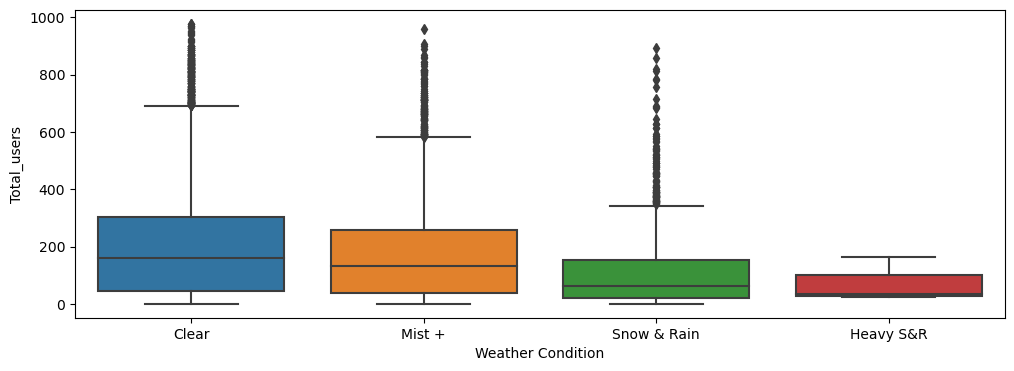

In [30]:
# Analyzing relation betwen Total Use and different weather conditions

plt.figure(figsize=(12, 4))

sns.boxplot(data= data, y = 'Total_Users', x = 'Weather_Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Total_users')
plt.xticks(range(4), ['Clear', 'Mist +', 'Snow & Rain', 'Heavy S&R'])

plt.show()

- Clear, Few clouds, Partly cloudy, Partly cloudy
- Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

As expected, we can conclude that the bike-sharing service is mostly used when the weather condition is clear, has mist or is cloudy. In this sense, the average usage of the bike-sharing service is quite higher when the weather conditions are sunny versus when there is mist/cloudy.

In the other hand, also as expected, when the weather conditions include rain or snow the bike-sharing service lowers with the average tending to zero as the weather conditions get worse.

Text(0, 0.5, 'Total_Users')

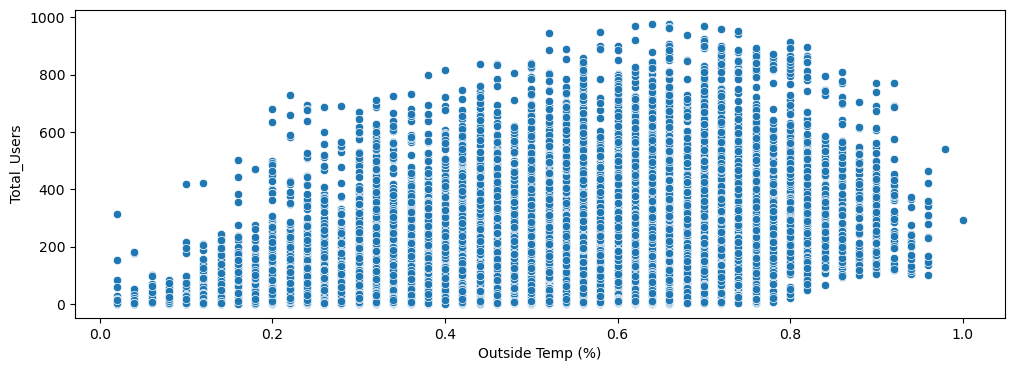

In [38]:
# Analyzing relation betwen Total Use and Outside Temprature conditions

plt.figure(figsize=(12, 4))

# plt.subplot(1,2,1)
sns.scatterplot(data= data, y = 'Total_Users', x = 'Temperature')
plt.xlabel('Outside Temp (%)')
plt.ylabel('Total_Users')

In [39]:
import plotly.express as px

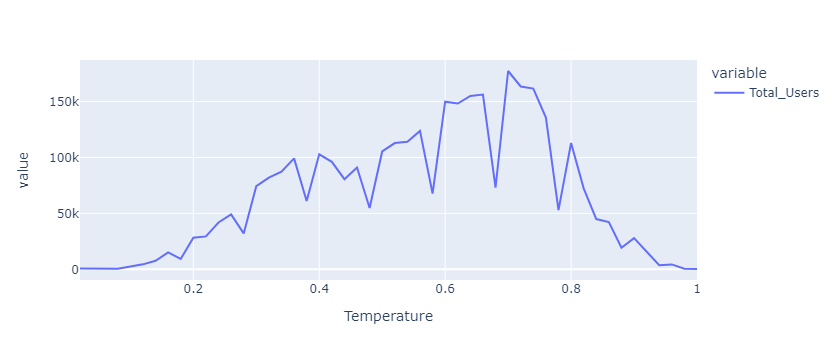

In [50]:
px.line(data.groupby('Temperature')['Total_Users'].sum())

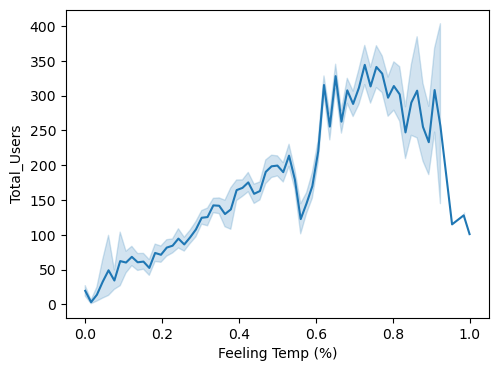

In [32]:
# Analyzing relation betwen Total Use and Feeling Temprature conditions

plt.figure(figsize=(12, 4))
plt.subplot(1,2,2)
sns.lineplot(data= data, y = 'Total_Users', x = 'Temperature_Feel')
plt.xlabel('Feeling Temp (%)')
plt.ylabel('Total_Users')

plt.show()

The outside temperature and the feeling temperature have a relation with the bike-sharing service. In this sense, with low outside and feeling temperatures the bike-sharing service is lower than when the outside and feeling temperature is higher. Nonetheless, there is a point in which at certain outside and feeling temperatures, the bike-sharing service remain at a constant level.

Text(0, 0.5, 'Total_Users')

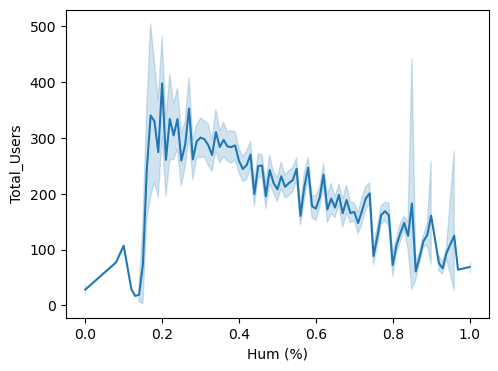

In [33]:
# Analyzing relation betwen Total Use and Humidity conditions

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.lineplot(data= data, y = 'Total_Users', x = 'Humidity')
plt.xlabel('Hum (%)')
plt.ylabel('Total_Users')

We can conclude that humidity affects bike-sharing service in a negative way. In this way, as humudity increases the usage of bikes decreases. This can be related to the weather conditions representing that when there is rain or snow there is more humidity, hence the bike-sharing service lowers.